# Code 3
## Explicit & Implicit

### Created on December 23rd, 2022
#### @Author:MustafA Teymouri 

# ****

## import modules & libraries

In [76]:
import matplotlib.pyplot as plt
import numpy as np

## Linspace function

In [77]:
def linspace(start,stop,num):
    x=[]
    dx= (stop-start)/(num-1)
    for i in range(num):
        start+i*dx
        x.append(start+i*dx)
    return x

## Explicit function

In [12]:
def Explicit(N,T2,alpha,L,RES,dt):
    X= linspace(0,L,N) # Mesh generating
    dx= L/(N-1)        # Mesh generating
    T=[T2[1]]*N
    T[0]= T2[0]
    T[N-1]= T2[2]
    r=alpha*dt/(dx**2)
    Tnew=[0]*N
    for i in range(N):
        Tnew[i]=T[i]
    res=100
    it= 0
    while res>RES:
        it=it+1
        for i in range(N):
            T[i]=Tnew[i]  
        if it%100== 0:
            plt.plot(X,T)
        re=0
        for i in range(1,N-1):
            Tnew[i]= T[i]+r*(T[i+1]-2*T[i]+T[i-1])
        for i in range(N):
            re=abs(T[i]-Tnew[i])+re
        res= re
    return print(it)

## initial temperature effect

1500


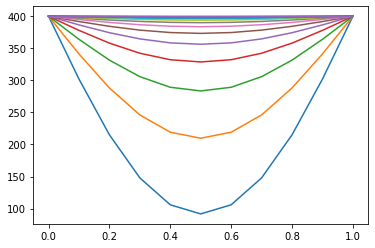

In [5]:
Explicit(11,[400,0,400],0.01,1,0.01,0.05)

1442


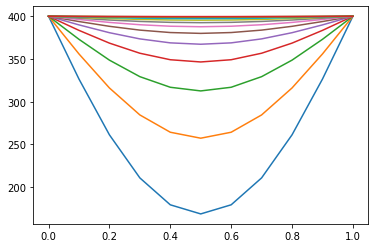

In [47]:
Explicit(11,[400,100,400],0.01,1,0.01,0.05)

1218


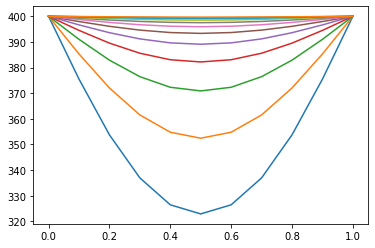

In [6]:
Explicit(11,[400,300,400],0.01,1,0.01,0.05)

## Length effect

1300


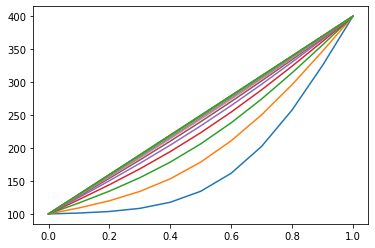

In [7]:
Explicit(11,[100,100,400],0.01,1,0.01,0.05)

36103


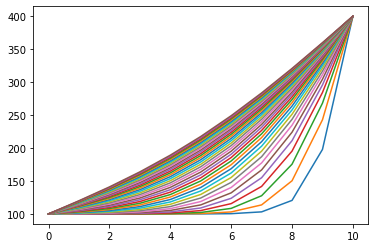

In [9]:
Explicit(11,[100,100,400],0.01,10,0.01,0.05)

## Nodes effect

36103


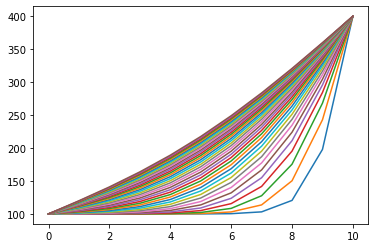

In [13]:
Explicit(11,[100,100,400],0.01,10,0.01,0.05)

84716


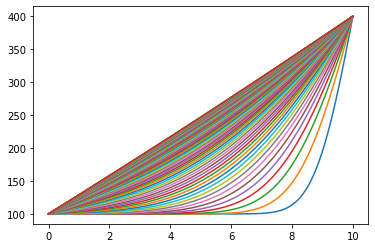

In [14]:
Explicit(110,[100,100,400],0.01,10,0.01,0.05)

## Time & dt effect

1442


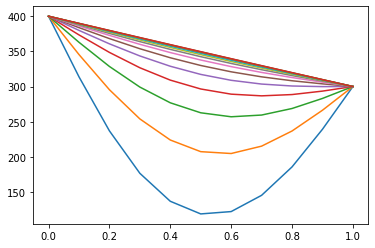

In [53]:
Explicit(11,[400,50,300],0.01,1,0.01,0.05)

790


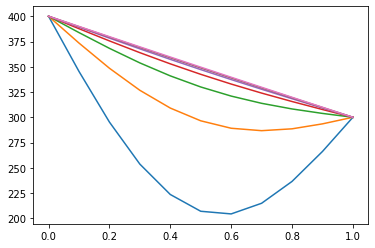

In [54]:
Explicit(11,[400,50,300],0.01,1,0.01,0.1)

## Coefficient Array

In [108]:
def coff(N,T2,alpha,L,dt):
    dx= L/(N-1)       
    dt=0.05
    T=[T2[1]]*N
    T[0]= T2[0]
    T[N-1]= T2[2]
    r=alpha*dt/(dx**2)
    coff= np.zeros((N,N))
    coff[0,0]= 1
    coff[N-1,N-1]= 1
    for i in range(1,N-1):
        coff[i,i-1]= -1*r
        coff[i,i+1]= -1*r
        coff[i,i]= 1+2*r
    return coff

## TDMA Function

In [79]:
def tdma(B,A):
    n= np.size(B)
    U=np.zeros((n))
    C= np.copy(B)
    for i in range(0,n-1):
        landa=-1*A[i+1,i]/A[i,i]
        A[i+1,i]= 0
        A[i+1,i+1]= (A[i,i+1]*landa)+A[i+1,i+1]
        C[i+1]= (landa*C[i]+C[i+1])
    U[n-1]= C[n-1]/A[n-1,n-1]
    for i in range(n-2,-1,-1):
        U[i]= (C[i]-(A[i,i+1]*U[i+1]))/A[i,i]
    return np.array(U)[np.newaxis].T 

## Implicit Function

In [96]:
def Implicit(N,T2,alpha,L,RES,dt):
    X= linspace(0,L,N)
    T=[T2[1]]*N
    T[0]= T2[0]
    T[N-1]= T2[2]
    
    Told= np.copy(T)[np.newaxis].T 
    Tnew= np.array(T)[np.newaxis].T
    
    res=2
    it=0
    while res> RES:
        it=it+1
        A= coff(N,T2,alpha,L,dt)
        Tnew= tdma(Told,A)
        res= sum(sum(abs(Told-Tnew)))
        if it%100 == 0:
            plt.plot(X,Told)
        Told= Tnew
    return it

## initial temperature effect

1507

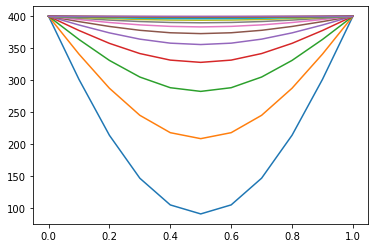

In [82]:
Implicit(11,[400,0,400],0.01,1,0.01,0.05)

1448

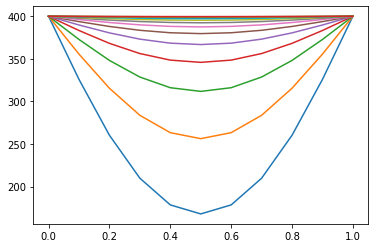

In [83]:
Implicit(11,[400,100,400],0.01,1,0.01,0.05)

1223

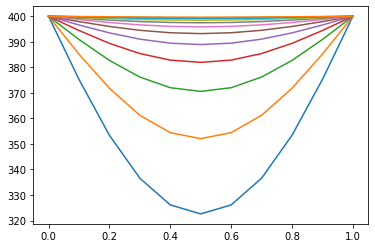

In [98]:
Implicit(11,[400,300,400],0.01,1,0.01,0.05)

## Length effect

1307

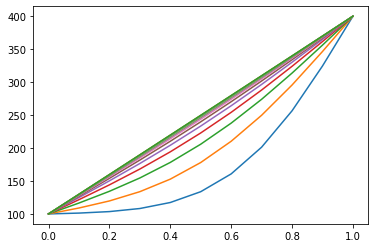

In [85]:
Implicit(11,[100,100,400],0.01,1,0.01,0.05)

36111

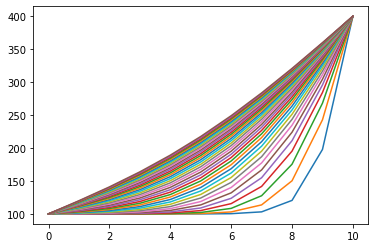

In [90]:
Implicit(11,[100,100,400],0.01,10,0.01,0.05)

## Nodes effect

36111

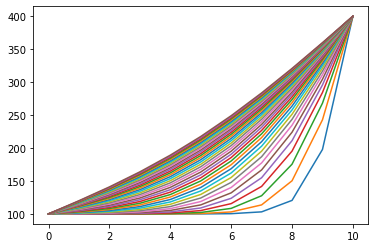

In [91]:
Implicit(11,[100,100,400],0.01,10,0.01,0.05)

84799

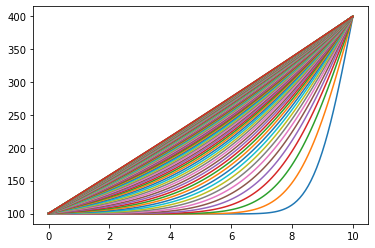

In [92]:
Implicit(110,[100,100,400],0.01,10,0.01,0.05)

## Time & dt effect

1448

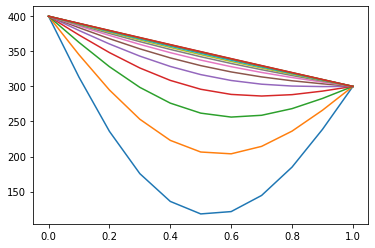

In [102]:
Implicit(11,[400,50,300],0.01,1,0.01,0.05)

1448

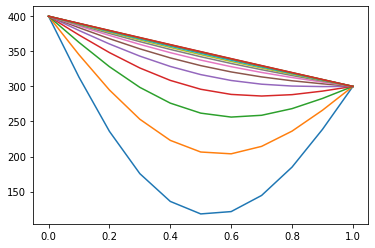

In [103]:
Implicit(11,[400,50,300],0.01,1,0.01,5)

## TDMA vs np.linalg.inv

In [109]:
def Implicit2(N,T2,alpha,L,RES,dt):
    X= linspace(0,L,N)
    T=[T2[1]]*N
    T[0]= T2[0]
    T[N-1]= T2[2]
    
    Told= np.copy(T)[np.newaxis].T 
    Tnew= np.array(T)[np.newaxis].T
    
    res=2
    it=0
    while res> RES:
        it=it+1
        A= coff(N,T2,alpha,L,dt)
        Tnew= np.dot(np.linalg.inv(A),Told)
        res= sum(sum(abs(Told-Tnew)))
        if it%1000 == 0:
            plt.plot(X,Told)
        Told= Tnew
    return it

84719

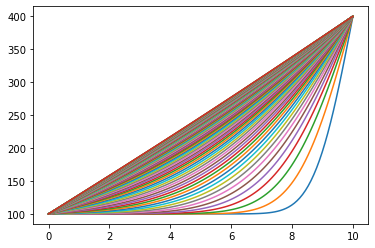

In [110]:
Implicit2(110,[100,100,400],0.01,10,0.01,0.05)